C:\Users\MAHESH\AppData\Local\Temp\ipykernel_6448\1057025805.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[['Close']].fillna(method='ffill')  # Forward fill missing values


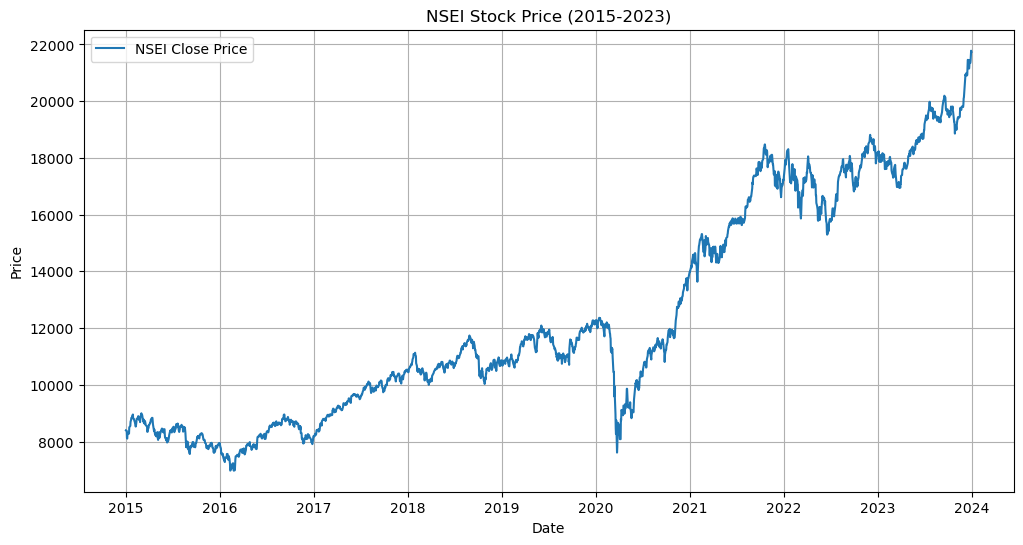

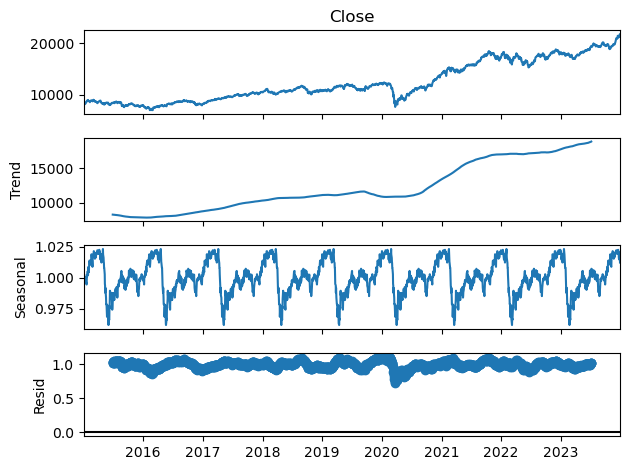

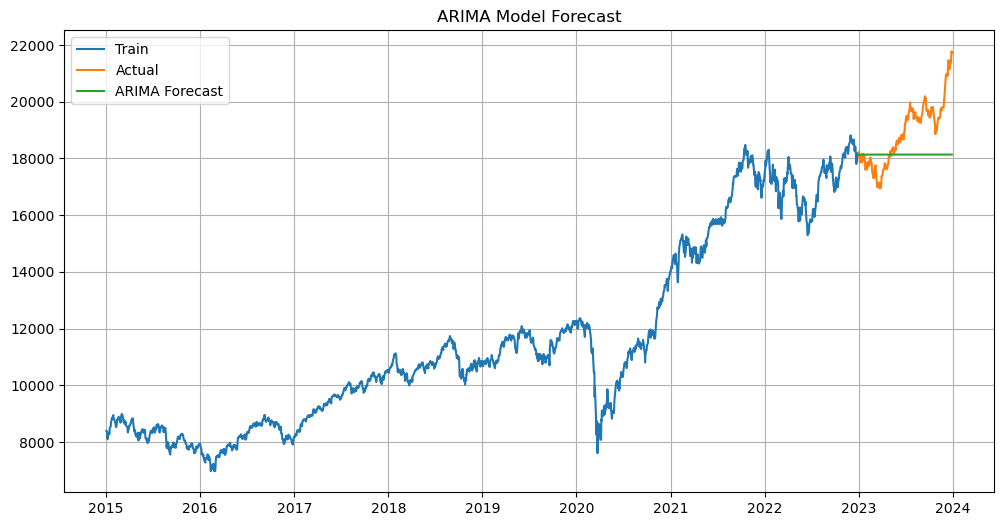

ARIMA MSE: 1808065.79


In [11]:
# Stock Market Time Series Analysis & Forecasting (Without Prophet)

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 2: Load Data
df = pd.read_csv("NSEI 2015-2023.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')  # Business day frequency
df = df[['Close']].fillna(method='ffill')  # Forward fill missing values

# Step 3: Visualize Stock Prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='NSEI Close Price')
plt.title("NSEI Stock Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Step 4: Decompose Time Series
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
result.plot()

plt.show()

# Step 5: Train-Test Split
train = df[:'2022']
test = df['2023':]

# Step 6: ARIMA Model
arima_model = ARIMA(train['Close'], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

# Plot ARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Model Forecast")
plt.grid()
plt.show()

# Evaluate ARIMA
mse_arima = mean_squared_error(test['Close'], arima_forecast)
print(f"ARIMA MSE: {mse_arima:.2f}")
